In [1]:
data_path = "data/cloud.png"
strength = 5.0

In [2]:
import imageio.v2 as imageio
import torchvision.transforms.functional as F
import torch
import torch.nn as nn
import numpy as np

img = imageio.imread(data_path)
if img.dtype == np.uint8:
    height_map = img.astype(np.float32) / 255.0
elif img.dtype == np.uint16 or img.dtype == np.int32:
    height_map = img.astype(np.float32) / 65535.0
height_map = torch.from_numpy(height_map).unsqueeze(0)

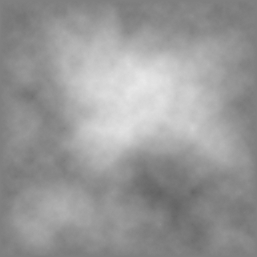

In [3]:
display(F.to_pil_image(height_map, mode="L"))

In [4]:
from h2n import HeightToNormal,Sobel

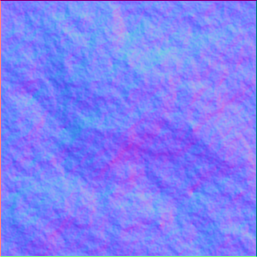

In [5]:
h2n = HeightToNormal(filter=Sobel(), strength=strength, invert_x=True)
normal = h2n(height_map.unsqueeze(0))
normal_map = (normal+1.0)*0.5
display(F.to_pil_image(normal_map.squeeze(0), mode="RGB"))